In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head(10)

Year_Factor State_Factor building_class  \
0            1      State_1     Commercial   
1            1      State_1     Commercial   
2            1      State_1     Commercial   
3            1      State_1     Commercial   
4            1      State_1     Commercial   
5            1      State_1     Commercial   
6            1      State_1     Commercial   
7            1      State_1     Commercial   
8            1      State_1     Commercial   
9            1      State_1     Commercial   

                               facility_type  floor_area  year_built  \
0               Grocery_store_or_food_market     61242.0      1942.0   
1  Warehouse_Distribution_or_Shipping_center    274000.0      1955.0   
2                       Retail_Enclosed_mall    280025.0      1951.0   
3                  Education_Other_classroom     55325.0      1980.0   
4                  Warehouse_Nonrefrigerated     66000.0      1985.0   
5                      Warehouse_Selfstorage    119900.0      1956.0   
6                  Warehouse_Nonrefrigerated     91367.0      1982.0   
7                  Warehouse_Nonrefrigerated     50422.0      1947.0   
8                       Office_Uncategorized    122020.0      1929.0   
9                       Office_Uncategorized    102612.0      1979.0   

   energy_star_rating  ELEVATION  january_min_temp  january_avg_temp  ...  \
0                11.0        2.4                36              50.5  ...   
1                45.0        1.8                36              50.5  ...   
2                97.0        1.8                36              50.5  ...   
3                46.0        1.8                36              50.5  ...   
4               100.0        2.4                36              50.5  ...   
5                 NaN        2.4                36              50.5  ...   
6                56.0        2.4                36              50.5  ...   
7                99.0        2.4                36              50.5  ...   
8                98.0        2.4                36              50.5  ...   
9                83.0        2.4                36              50.5  ...   

   days_above_80F  days_above_90F  days_above_100F  days_above_110F  \
0              14               0                0                0   
1              14               0                0                0   
2              14               0                0                0   
3              14               0                0                0   
4              14               0                0                0   
5              14               0                0                0   
6              14               0                0                0   
7              14               0                0                0   
8              14               0                0                0   
9              14               0                0                0   

   direction_max_wind_speed  direction_peak_wind_speed  max_wind_speed  \
0                       1.0                        1.0             1.0   
1                       1.0                        NaN             1.0   
2                       1.0                        NaN             1.0   
3                       1.0                        NaN             1.0   
4                       1.0                        1.0             1.0   
5                       1.0                        1.0             1.0   
6                       1.0                        1.0             1.0   
7                       1.0                        1.0             1.0   
8                       1.0                        1.0             1.0   
9                       1.0                        1.0             1.0   

   days_with_fog    site_eui  id  
0            NaN  248.682615   0  
1           12.0   26.500150   1  
2           12.0   24.693619   2  
3           12.0   48.406926   3  
4            NaN    3.899395   4  
5            NaN    6.597715   5  
6            

In [4]:
train_df['days_above_110F'].isna().sum()

0

In [5]:
train_df.describe

<bound method NDFrame.describe of        Year_Factor State_Factor building_class  \
0                1      State_1     Commercial   
1                1      State_1     Commercial   
2                1      State_1     Commercial   
3                1      State_1     Commercial   
4                1      State_1     Commercial   
...            ...          ...            ...   
75752            6     State_11     Commercial   
75753            6     State_11    Residential   
75754            6     State_11     Commercial   
75755            6     State_11     Commercial   
75756            6     State_11    Residential   

                                   facility_type  floor_area  year_built  \
0                   Grocery_store_or_food_market     61242.0      1942.0   
1      Warehouse_Distribution_or_Shipping_center    274000.0      1955.0   
2                           Retail_Enclosed_mall    280025.0      1951.0   
3                      Education_Other_classroom     55325.0 

In [6]:
train_df['building_class'].unique()

array(['Commercial', 'Residential'], dtype=object)

In [7]:
train_df['State_Factor'].unique()

array(['State_1', 'State_2', 'State_4', 'State_6', 'State_8', 'State_10',
       'State_11'], dtype=object)

In [8]:
train_df['facility_type'].unique()

array(['Grocery_store_or_food_market',
       'Warehouse_Distribution_or_Shipping_center',
       'Retail_Enclosed_mall', 'Education_Other_classroom',
       'Warehouse_Nonrefrigerated', 'Warehouse_Selfstorage',
       'Office_Uncategorized', 'Data_Center', 'Commercial_Other',
       'Mixed_Use_Predominantly_Commercial',
       'Office_Medical_non_diagnostic', 'Education_College_or_university',
       'Industrial', 'Laboratory',
       'Public_Assembly_Entertainment_culture',
       'Retail_Vehicle_dealership_showroom', 'Retail_Uncategorized',
       'Lodging_Hotel', 'Retail_Strip_shopping_mall',
       'Education_Uncategorized', 'Health_Care_Inpatient',
       'Public_Assembly_Drama_theater', 'Public_Assembly_Social_meeting',
       'Religious_worship', 'Mixed_Use_Commercial_and_Residential',
       'Office_Bank_or_other_financial', 'Parking_Garage',
       'Commercial_Unknown', 'Service_Vehicle_service_repair_shop',
       'Service_Drycleaning_or_Laundry', 'Public_Assembly_Recreation

In [9]:
facility_groups = {
        "2to4_5plus_Mixed": {
            "2to4_Unit_Building",
            "5plus_Unit_Building",
            "Mixed_Use_Predominantly_Residential",
        },
        "Commercial_Education_Mixed_Industrial_Parking": {
            "Education_College_or_university",
            "Education_Other_classroom",
            "Education_Preschool_or_daycare",
            "Education_Uncategorized",
            "Commercial_Other",
            "Commercial_Unknown",
            "Mixed_Use_Commercial_and_Residential",
            "Mixed_Use_Predominantly_Commercial",
            "Industrial",
            "Parking_Garage",
        },
        "Food_Grocery": {
            "Food_Sales",
            "Food_Service_Other",
            "Food_Service_Restaurant_or_cafeteria",
            "Food_Service_Uncategorized",
            "Grocery_store_or_food_market",
        },
        "Health": {
            "Health_Care_Inpatient",
            "Health_Care_Outpatient_Clinic",
            "Health_Care_Outpatient_Uncategorized",
            "Health_Care_Uncategorized",
        },
        "Laboratory_Data": {"Laboratory", "Data_Center"},
        "Lodging": {
            "Lodging_Dormitory_or_fraternity_sorority",
            "Lodging_Hotel",
            "Lodging_Other",
            "Lodging_Uncategorized",
        },
        "Multifamily": {"Multifamily_Uncategorized"},
        "Office_Nursing": {
            "Office_Bank_or_other_financial",
            "Office_Medical_non_diagnostic",
            "Office_Mixed_use",
            "Office_Uncategorized",
            "Nursing_Home",
        },
        "Public": {
            "Public_Assembly_Drama_theater",
            "Public_Assembly_Entertainment_culture",
            "Public_Assembly_Library",
            "Public_Assembly_Movie_Theater",
            "Public_Assembly_Other",
            "Public_Assembly_Recreation",
            "Public_Assembly_Social_meeting",
            "Public_Assembly_Stadium",
            "Public_Assembly_Uncategorized",
            "Public_Safety_Courthouse",
            "Public_Safety_Fire_or_police_station",
            "Public_Safety_Penitentiary",
            "Public_Safety_Uncategorized",
        },
        "Religious": {"Religious_worship"},
        "Retail": {
            "Retail_Enclosed_mall",
            "Retail_Strip_shopping_mall",
            "Retail_Uncategorized",
            "Retail_Vehicle_dealership_showroom",
        },
        "Warehouse_Service": {
            "Warehouse_Distribution_or_Shipping_center",
            "Warehouse_Nonrefrigerated",
            "Warehouse_Refrigerated",
            "Warehouse_Selfstorage",
            "Warehouse_Uncategorized",
            "Service_Drycleaning_or_Laundry",
            "Service_Uncategorized",
            "Service_Vehicle_service_repair_shop",
        }
    }

In [10]:
facility_groups = {
    {'1': '2to4UnitBuilding', '5plusUnitBuilding', 'Mixed_Use_Predominantly_Residential'},
    {'2': 'Food_Sales', 'Food_Service_Other', 'Food_Service_Restaurant_or_cafeteria', 'Food_Service_Uncategorized', 'Grocery_store_or_food_market'}
    {'3': 'Health_Care_Inpatient', 'Health_Care_Outpatient_Clinic', 'Health_Care_Outpatient_Uncategorized'}
}

SyntaxError: ':' expected after dictionary key (3383997363.py, line 2)

/var/folders/d1/vrysq4bx4hx0b4cnbfmzcdr40000gn/T/ipykernel_18269/1040448305.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(), annot=True, cmap=plt.cm.CMRmap_r)


<Axes: >

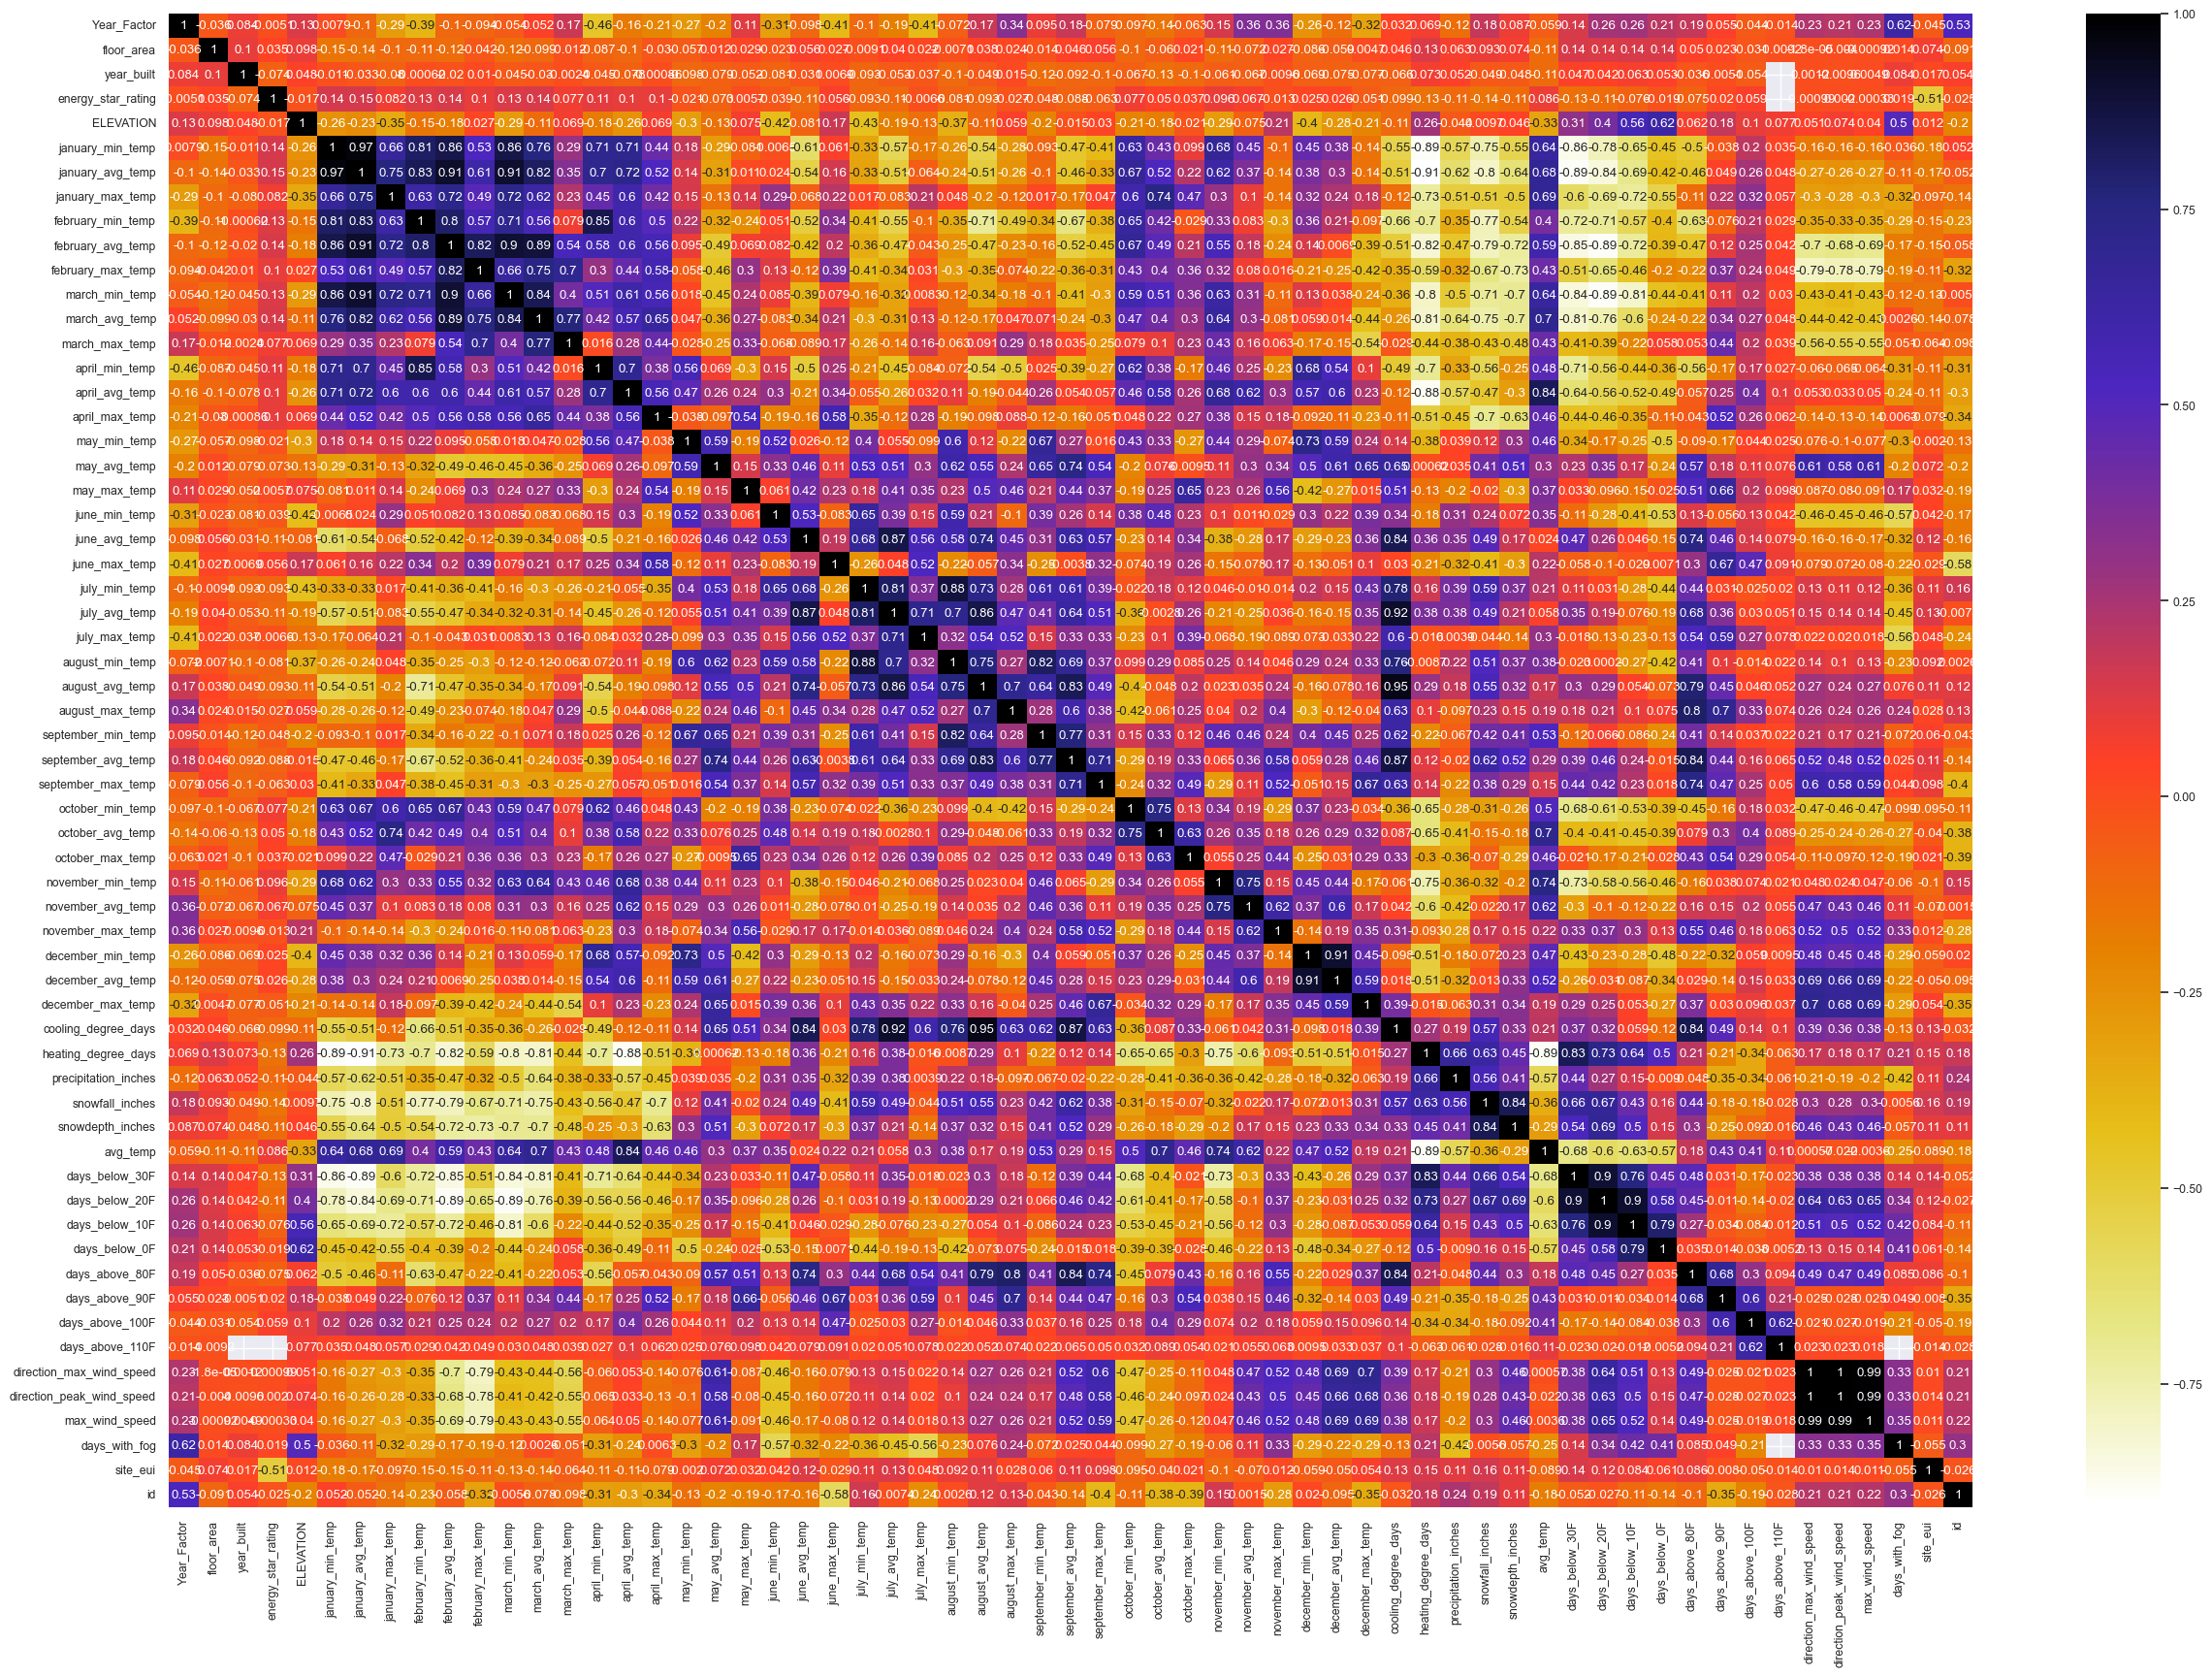

In [11]:
plt.figure(figsize=(30,20))
sns.set(font_scale=0.8)
sns.heatmap(train_df.corr(), annot=True, cmap=plt.cm.CMRmap_r)

Year_Factor State_Factor building_class  \
10696            4      State_4     Commercial   
10697            4      State_4     Commercial   
10698            4      State_4     Commercial   
10699            4      State_4     Commercial   
10700            4      State_4     Commercial   
10701            4      State_4     Commercial   
10702            4      State_4     Commercial   
10703            4      State_4     Commercial   
10704            4      State_4     Commercial   
10705            4      State_4     Commercial   
10706            4      State_4     Commercial   
10707            4      State_4     Commercial   
10708            4      State_4     Commercial   
10709            4      State_4     Commercial   
10710            4      State_4     Commercial   
10711            4      State_4     Commercial   
10712            4      State_4     Commercial   
10713            4      State_4     Commercial   
10714            4      State_4     Commercial   
10715            4      State_4     Commercial   
10716            4      State_4     Commercial   
10717            4      State_4     Commercial   
10718            4      State_4     Commercial   
10719            4      State_4     Commercial   
10720            4      State_4     Commercial   

                         facility_type  floor_area  year_built  \
10696            Health_Care_Inpatient    681807.0      1960.0   
10697            Health_Care_Inpatient   1335452.0      1908.0   
10698  Education_College_or_university    544380.0      1993.0   
10699            Health_Care_Inpatient    433224.0      1955.0   
10700        Education_Other_classroom    398320.0      1934.0   
10701        Education_Other_classroom    388970.0      1939.0   
10702        Education_Other_classroom    455800.0      1910.0   
10703        Education_Other_classroom    713935.0      1932.0   
10704        Education_Other_classroom    260140.0      1971.0   
10705        Education_Other_classroom    266099.0      1898.0   
10706  Education_College_or_university    954142.0      1976.0   
10707            Health_Care_Inpatient    412000.0      1952.0   
10708  Education_College_or_university   1258489.0      1961.0   
10709        Education_Other_classroom    319900.0      1927.0   
10710        Education_Other_classroom    248453.0      1928.0   
10711       Retail_Strip_shopping_mall    273613.0      1958.0   
10712        Education_Other_classroom    291204.0      1912.0   
10713             Office_Uncategorized    441327.0      1983.0   
10714             Office_Uncategorized    538105.0      1969.0   
10715             Office_Uncategorized    417395.0      1980.0   
10716            Health_Care_Inpatient   1096075.0      1953.0   
10717             Office_Uncategorized    676939.0      1985.0   
10718             Office_Uncategorized    310839.0      1969.0   
10719             Office_Uncategorized    252250.0      1969.0   
10720             Office_Uncategorized    256010.0      1969.0   

       energy_star_rating  ELEVATION  january_min_temp  january_avg_temp  ...  \
10696                36.0      210.3               -19         10.806452  ...   
10697                89.0      210.3               -19         10.806452  ...   
10698                 NaN      210.3               -18         12.258065  ...   
10699                62.0      210.3               -18         12.258065  ...   
10700                66.0      210.3               -18         12.258065  ...   
10701                82.0      210.3               -18         12.258065  ...   
10702                80.0      210.3               -18         12.258065  ...   
10703                15.0      210.3               -18         12.258065  ...   
10704                 2.0      210.3               -19         10.806452  ...   
10705                85.0      210.3               -19         10.806452  ...   
10706                 NaN      210.3               -19         10.806452  ...   
10707            

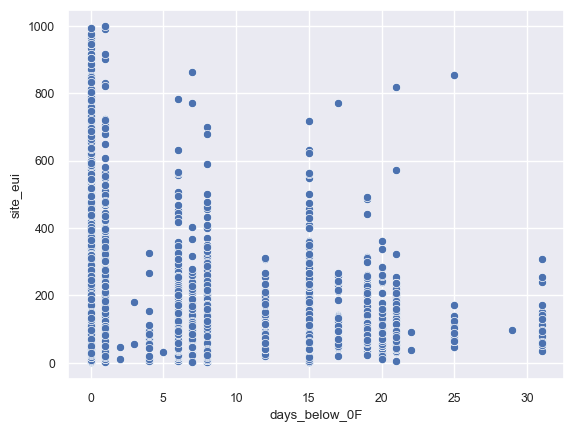

In [12]:
sns.scatterplot(x=train_df['days_below_0F'], y=train_df['site_eui'])
train_df[train_df['days_below_0F'] > 30]

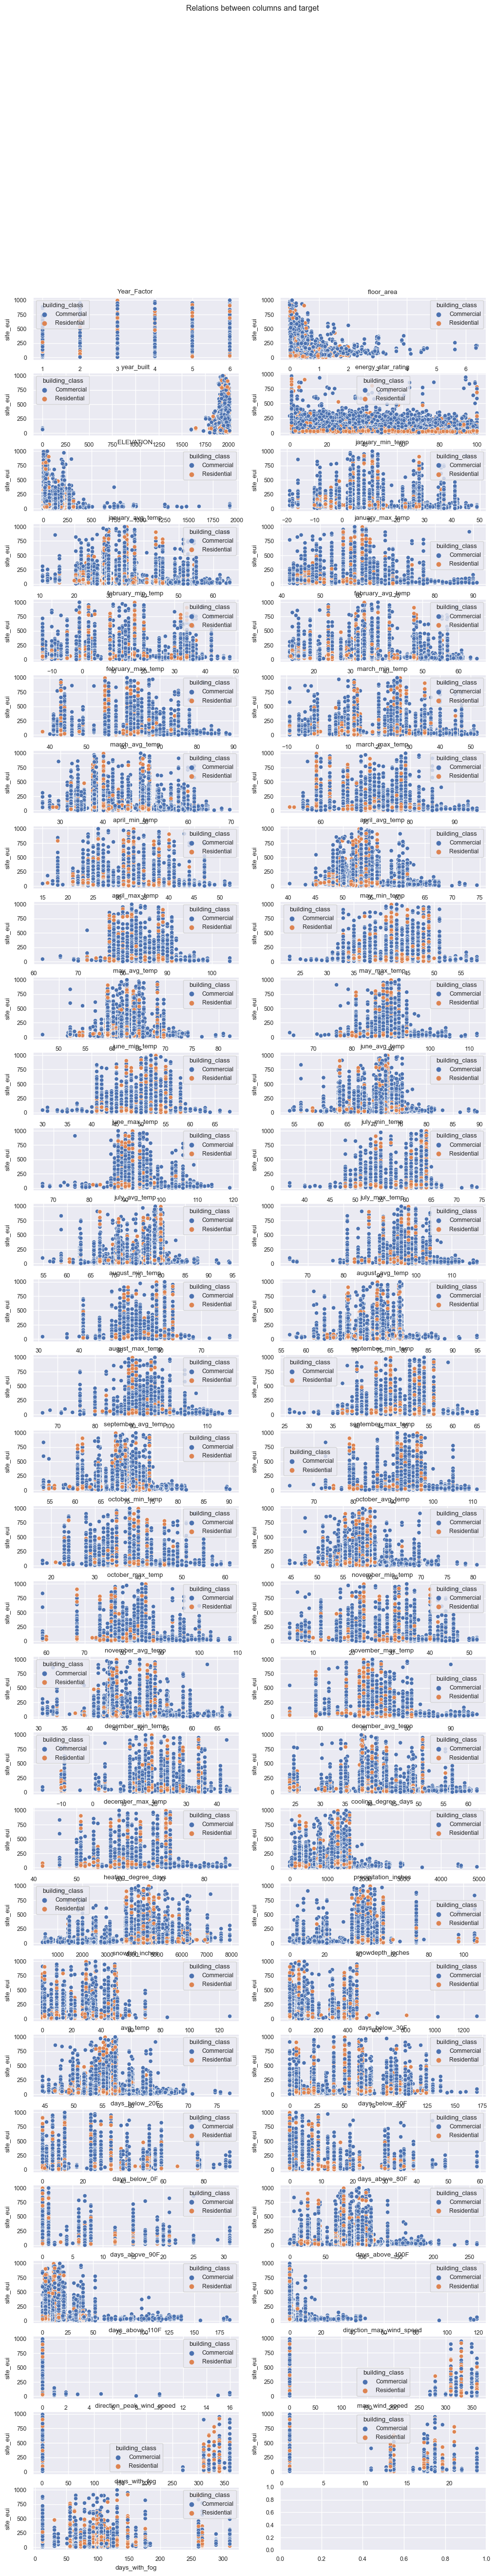

In [13]:
ndf = train_df.drop(['id','site_eui'], axis=1)
target = train_df['site_eui']

col_list = [col for col in ndf.columns if ndf[col].dtype != 'object']

fig, ax = plt.subplots(30,2, figsize=(12,60))
for idx, col in enumerate(col_list):
    sns.scatterplot(x=col, y='site_eui', data=train_df,hue=ndf['building_class'], ax=ax[idx//2, idx%2])
    ax[idx//2, idx%2].grid(visible=True)
    ax[idx//2, idx%2].set_title(f'{col} ')
    
plt.suptitle('Relations between columns and target')
plt.show()

In [18]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
label_train_df = train_df.copy()
object_cols = ['State_Factor', 'building_class', 'facility_type']
label_train_df[object_cols] = ordinal_encoder.fit_transform(train_df[object_cols])
label_train_df['energy_star_rating'] = label_train_df['energy_star_rating'].fillna(label_train_df['energy_star_rating'].mean())
label_train_df['direction_max_wind_speed'] = label_train_df['direction_max_wind_speed'].fillna(1.0)
label_train_df['direction_peak_wind_speed'] = label_train_df['direction_peak_wind_speed'].fillna(1.0)
label_train_df['max_wind_speed'] = label_train_df['max_wind_speed'].fillna(1.0)
label_train_df['days_with_fog'] = label_train_df['days_with_fog'].fillna(label_train_df['days_with_fog'].mean())

Xtraindf = label_train_df.fillna(0)
Xtraindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  float64
 2   building_class             75757 non-null  float64
 3   facility_type              75757 non-null  float64
 4   floor_area                 75757 non-null  float64
 5   year_built                 75757 non-null  float64
 6   energy_star_rating         75757 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

/Users/cdaubac1/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/cdaubac1/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/cdaubac1/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/cdaubac1/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will c

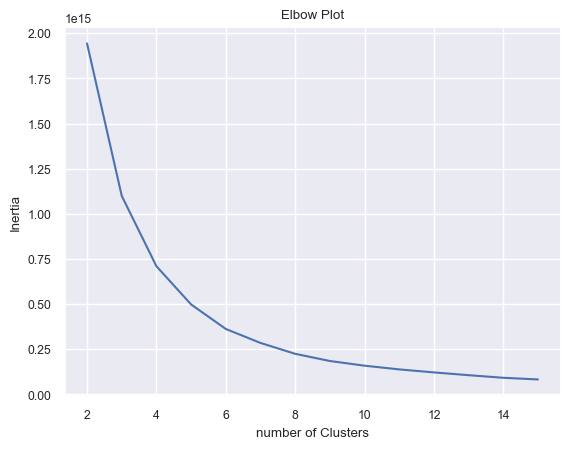

In [33]:
from sklearn.cluster import KMeans
inertia = []
for i in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]:
    model = KMeans(n_clusters = i).fit(Xtraindf)
    model.fit(Xtraindf)
    inertia.append(model.inertia_)
plt.plot(range(2,16), inertia)
plt.title('Elbow Plot')
plt.xlabel('number of Clusters')
plt.ylabel('Inertia')
plt.show() 

In [27]:
cluster_pred = model.predict(Xtraindf)
Xtraindf['cluster'] = cluster_pred
Xtraindf.head()

Year_Factor  State_Factor  building_class  facility_type  floor_area  \
0            1           0.0             0.0           13.0     61242.0   
1            1           0.0             0.0           55.0    274000.0   
2            1           0.0             0.0           48.0    280025.0   
3            1           0.0             0.0            6.0     55325.0   
4            1           0.0             0.0           56.0     66000.0   

   year_built  energy_star_rating  ELEVATION  january_min_temp  \
0      1942.0                11.0        2.4                36   
1      1955.0                45.0        1.8                36   
2      1951.0                97.0        1.8                36   
3      1980.0                46.0        1.8                36   
4      1985.0               100.0        2.4                36   

   january_avg_temp  ...    site_eui  id  Avg_min_temp_winter  \
0              50.5  ...  248.682615   0            39.714286   
1              50.5  ...   26.500150   1            39.714286   
2              50.5  ...   24.693619   2            39.714286   
3              50.5  ...   48.406926   3            39.714286   
4              50.5  ...    3.899395   4            39.714286   

   Avg_max_temp_winter  Avg_temp_winter  Avg_min_temp_summer  \
0                 75.0        53.767594                 50.4   
1                 75.0        53.767594                 50.4   
2                 75.0        53.767594                 50.4   
3                 75.0        53.767594                 50.4   
4                 75.0        53.767594                 50.4   

   Avg_max_temp_summer  Avg_temp_summer  Avg_days_below30F  cluster  
0                 86.6        61.378387                0.0        9  
1                 86.6        61.378387                0.0        4  
2                 86.6        61.378387                0.0        4  
3                 86.6        61.378387                0.0        9  
4                 86.6        61.378387                0.0        9  

[5 rows x 72 columns]

In [20]:
Xtraindf['Avg_min_temp_winter'] = (Xtraindf['january_min_temp'] + Xtraindf['february_min_temp'] + Xtraindf['march_min_temp'] + Xtraindf['april_min_temp'] + Xtraindf['october_min_temp'] + Xtraindf['november_min_temp'] + Xtraindf['december_min_temp'])/7
Xtraindf['Avg_max_temp_winter'] = (Xtraindf['january_max_temp'] + Xtraindf['february_max_temp'] + Xtraindf['march_max_temp'] + Xtraindf['april_max_temp'] + Xtraindf['october_max_temp'] + Xtraindf['november_max_temp'] + Xtraindf['december_max_temp'])/7
Xtraindf['Avg_temp_winter'] = (Xtraindf['january_avg_temp'] + Xtraindf['february_avg_temp'] + Xtraindf['march_avg_temp'] + Xtraindf['april_avg_temp'] + Xtraindf['october_avg_temp'] + Xtraindf['november_avg_temp'] + Xtraindf['december_avg_temp'])/7
Xtraindf['Avg_min_temp_summer'] = (Xtraindf['may_min_temp'] + Xtraindf['june_min_temp'] + Xtraindf['july_min_temp'] + Xtraindf['august_min_temp'] + Xtraindf['september_min_temp'])/5 
Xtraindf['Avg_max_temp_summer'] = (Xtraindf['may_max_temp'] + Xtraindf['june_max_temp'] + Xtraindf['july_max_temp'] + Xtraindf['august_max_temp'] + Xtraindf['september_max_temp'])/5
Xtraindf['Avg_temp_summer'] = (Xtraindf['may_avg_temp'] + Xtraindf['june_avg_temp'] + Xtraindf['july_avg_temp'] + Xtraindf['august_avg_temp'] + Xtraindf['september_avg_temp'])/5 
Xtraindf['Avg_days_below30F'] = (Xtraindf['days_below_30F'] + Xtraindf['days_below_20F'] + Xtraindf['days_below_10F'] + Xtraindf['days_below_0F'])/4
months_cols = list(Xtraindf.iloc[:,5:41].columns) + ['days_below_30F','days_below_20F', 'days_below_10F','days_below_0F','direction_max_wind_speed', 'direction_peak_wind_speed','snowdepth_inches','avg_temp','days_above_90F']

In [22]:
label_test_df = test_df.copy()
label_test_df[object_cols] = ordinal_encoder.transform(test_df[object_cols])
label_test_df['energy_star_rating'] = label_test_df['energy_star_rating'].fillna(label_test_df['energy_star_rating'].mean())
label_test_df['direction_max_wind_speed'] = label_test_df['direction_max_wind_speed'].fillna(1.0)
label_test_df['direction_peak_wind_speed'] = label_test_df['direction_peak_wind_speed'].fillna(1.0)
label_test_df['max_wind_speed'] = label_test_df['max_wind_speed'].fillna(1.0)
label_test_df['days_with_fog'] = label_test_df['days_with_fog'].fillna(label_test_df['days_with_fog'].mean())
Xtestdf = label_test_df.fillna(0)
Xtestdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9705 entries, 0 to 9704
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                9705 non-null   int64  
 1   State_Factor               9705 non-null   float64
 2   building_class             9705 non-null   float64
 3   facility_type              9705 non-null   float64
 4   floor_area                 9705 non-null   float64
 5   year_built                 9705 non-null   float64
 6   energy_star_rating         9705 non-null   float64
 7   ELEVATION                  9705 non-null   float64
 8   january_min_temp           9705 non-null   int64  
 9   january_avg_temp           9705 non-null   float64
 10  january_max_temp           9705 non-null   int64  
 11  february_min_temp          9705 non-null   int64  
 12  february_avg_temp          9705 non-null   float64
 13  february_max_temp          9705 non-null   int64

In [23]:
y = Xtraindf['site_eui'].values
X = Xtraindf.drop(columns=['site_eui', 'id'])
cols = X.columns
X = X.values

In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [169]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor(n_estimators=200, max_depth=8)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
score = rf.score(X_test, y_test)
print(score)

0.2709248062363484
